In [77]:
import qiskit
from qiskit import *
print(qiskit.__version__)
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

0.18.2


# 1

In [78]:
secret_number = '101001'

# here work is happen like buttom to up
for position,value in enumerate(reversed(secret_number)):
    if value == '1':
        print(position, value)

0 1
3 1
5 1


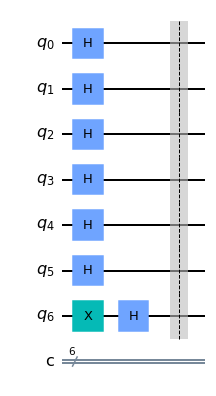

In [79]:
circuit = QuantumCircuit(6+1, 6)

circuit.h([0,1,2,3,4,5])
circuit.x(6)
circuit.h(6)
circuit.barrier()
circuit.draw(output='mpl')

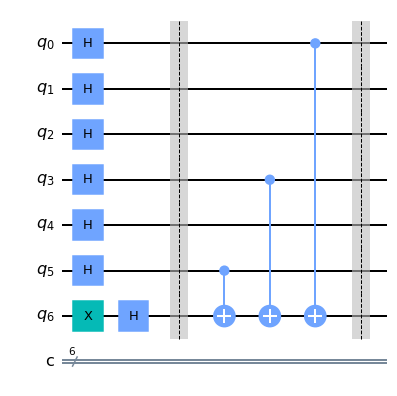

In [80]:
circuit.cx(5, 6)
circuit.cx(3, 6)
circuit.cx(0, 6)
circuit.barrier()
circuit.draw(output='mpl')

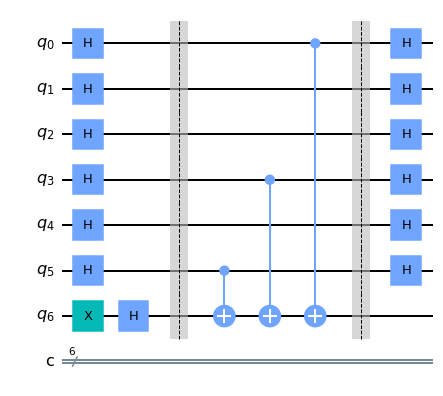

In [81]:
circuit.h([0,1,2,3,4,5])
circuit.draw(output='mpl')

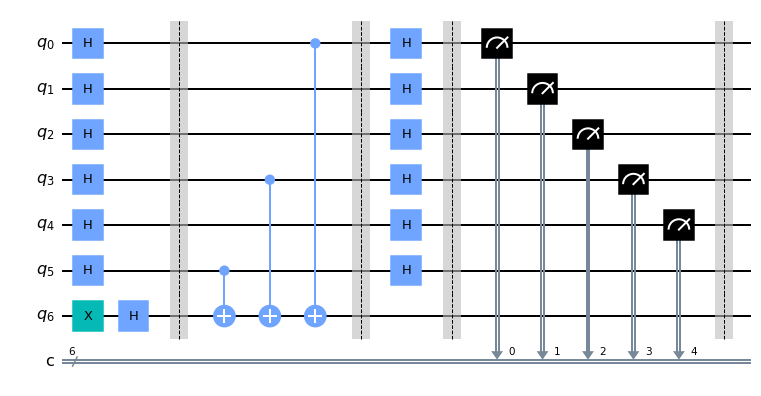

In [82]:
circuit.barrier()
circuit.measure([i for i in range(5)],[i for i in range(5)])
circuit.barrier()
circuit.draw(output='mpl')

In [83]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend=simulator, shots=1)
result = job.result()
counts = result.get_counts()
print(counts)

{'001001': 1}


# 2

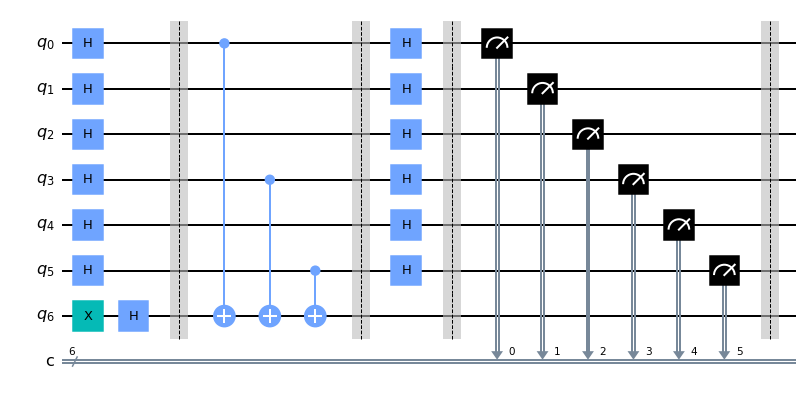

In [84]:
circuit = QuantumCircuit(len(secret_number)+1, len(secret_number))

circuit.h(range(len(secret_number)))
circuit.x(len(secret_number))
circuit.h(len(secret_number))
circuit.barrier()

for position,value in enumerate(reversed(secret_number)):
    if value == '1':
        circuit.cx(position, len(secret_number))

circuit.barrier()
circuit.h(range(len(secret_number)))
circuit.barrier()

circuit.measure(range(len(secret_number)), range(len(secret_number)))
circuit.barrier()

circuit.draw(output='mpl')

In [85]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend=simulator, shots=1)
result = job.result()
counts = result.get_counts()
print(counts)

{'101001': 1}


# 3

In [ ]:
def find_secret_number(secter_number):
    secret_number = str(secter_number)
    # Using Bernstein Vazirani Algorithm
    circuit = QuantumCircuit(len(secret_number)+1, len(secret_number))

    circuit.h(range(len(secret_number)))
    circuit.x(len(secret_number))
    circuit.h(len(secret_number))
    circuit.barrier()

    for position,value in enumerate(reversed(secret_number)):
        if value == '1':
            circuit.cx(position, len(secret_number))

    circuit.barrier()
    circuit.h(range(len(secret_number)))
    circuit.barrier()

    circuit.measure(range(len(secret_number)), range(len(secret_number)))
    circuit.barrier()

    circuit.draw(output='mpl')
    
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circuit, backend=simulator, shots=1)
    result = job.result()
    counts = result.get_counts()
    print(counts)

secret_number = int(input("enter number: "))
find_secret_number(secret_number)